In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint as pp
from typing import Dict, List, Tuple

import random
import csv

In [2]:
G = nx.tutte_graph()

## Visualization

In [5]:
def generate_graph(nodes: List) -> nx.Graph:
    R = nx.Graph()
    R.add_nodes_from(nodes)
    R.add_edges_from(nx.utils.pairwise(nodes))
    return R

In [6]:
def get_node_color_result(kinputs, koutputs, union_result):
    color_map = []
    for n in union_result:
        if n in kinputs:
            color_map.append("green")
        elif n in koutputs:
            color_map.append("blue")
        else:
            color_map.append("yellow")
    return color_map

In [57]:
def get_edge_weight(G, result):
    r = result.edges()
    
    ans = []
    for g in G.edges():
        if g in r:
            ans.append(5)
        else:
            ans.append(1)
    return ans

In [7]:
def visualize_graph(Graph: nx.Graph, figsize: tuple=(15,15), color_map: List[str]=None, node_size: int=3000, with_labels: bool=True) -> None:
    if color_map == None:
        color_map = "yellow"
    else:
        color_map = color_map
    
    plt.figure(1,figsize=figsize) 
    nx.draw_kamada_kawai(Graph, node_color=color_map, with_labels=with_labels, node_size=node_size, font_size=20,font_family="Noto Serif CJK JP")
    plt.show()

In [30]:
def visualize_graph_in_all(Graph: nx.Graph, figsize: tuple=(15,15), color_map: List[str]=None, node_size: int=3000, weights: List[int] = None, with_labels: bool=True) -> None:
    if color_map == None:
        color_map = "yellow"
    else:
        color_map = color_map
    
    plt.figure(1,figsize=figsize) 
    nx.draw_kamada_kawai(Graph, node_color=color_map, with_labels=with_labels, node_size=node_size, font_size=20,width=weights,font_family="Noto Serif CJK JP")
    plt.show()

# Algorithm

## Brute Force

In [44]:
def find_path_bf(MOrig: List, MDest: List) -> nx.Graph:
    
    result = []
    
    for kin in MOrig:
        for kout in MDest:
            sp_raw = nx.dijkstra_path(G, source=kin, target=kout)
            sp_graph = generate_graph(sp_raw)
            
            result.append(sp_graph)
    
    
    return nx.compose_all(result)        

## A*

In [61]:
def common_neighbor(u, v):
    return len(list(nx.common_neighbors(G, u, v)))

In [62]:
def jaccard_function(u, v):
    union_size = len(set(G[u]) | set(G[v])) # union neighbor
    if union_size == 0:
        return 0
    return len(list(nx.common_neighbors(G, u, v))) / union_size

In [63]:
def find_path_astar(MOrig: List, MDest: List, heuristic_func) -> nx.Graph:
    
    result = []
    
    for kin in MOrig:
        for kout in MDest:
            sp_raw = nx.astar_path(G, source=kin, target=kout, heuristic=heuristic_func)
            sp_graph = generate_graph(sp_raw)
            
            result.append(sp_graph)
    
    
    return nx.compose_all(result)        

## Steiner Tree

In [70]:
def find_path_steiner(MOrig: List, MDest: List) -> nx.Graph:
    
    return nx.algorithms.approximation.steinertree.steiner_tree(G, MOrig + MDest)     

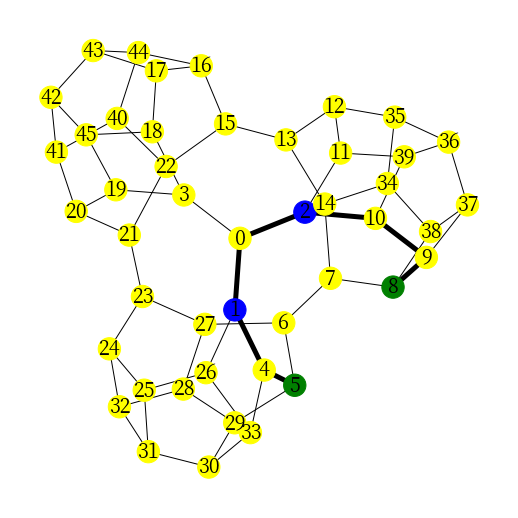

In [71]:
result = find_path_steiner(inputs, outputs)
visualize_graph_in_all(Graph=G, figsize=(7,7), node_size=500, weights=get_edge_weight(G, result),color_map=get_node_color_result(inputs, outputs, G))

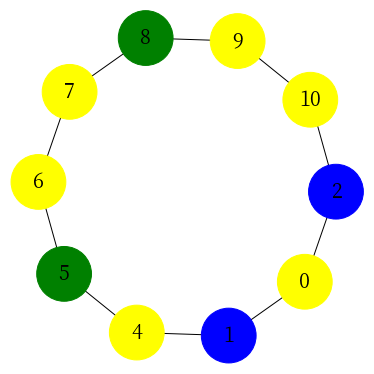

In [37]:
result = find_path_bf(inputs, outputs)
visualize_graph(Graph=result, figsize=(5,5), color_map=get_node_color_result(inputs, outputs, result))